In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import h5py
import cv2; print(f"\t\t– CV2 VERSION: {cv2.__version__}");

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


		– CV2 VERSION: 4.10.0


In [2]:
class CFG:
    is_kaggle = False
    if not is_kaggle:
        TRAIN_DIR = Path('/root/Development/Kaggle/ISIC2024/data/raw/train-image/image')
        TRAIN_HDF5 = Path('/root/Development/Kaggle/ISIC2024/data/raw/train-image.hdf5')
        TEST_HDF5 = Path('/root/Development/Kaggle/ISIC2024/data/raw/test-image.hdf5')
        TRAIN_META = Path('/root/Development/Kaggle/ISIC2024/data/raw/train-metadata.csv')
        TEST_META = Path('/root/Development/Kaggle/ISIC2024/data/raw/test-metadata.csv')
        SAMPLE_SUB = Path('/root/Development/Kaggle/ISIC2024/data/raw/sample_submission.csv')
        ADD_META = Path('/root/Development/Kaggle/ISIC2024/data/external/All/metadata.csv')
        ADD_TRAIN_HDF5 = Path('/root/Development/Kaggle/ISIC2024/data/external/All/image.hdf5')

In [9]:
train_meta_original = pd.read_csv(CFG.TRAIN_META)
train_meta = pd.read_csv(CFG.ADD_META)
test_meta = pd.read_csv(CFG.TEST_META)

/tmp/ipykernel_446562/1257907114.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_meta_original = pd.read_csv(CFG.TRAIN_META)
/tmp/ipykernel_446562/1257907114.py:2: DtypeWarning: Columns (8,13,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  train_meta = pd.read_csv(CFG.ADD_META)


In [4]:
def unique_elements(list1, list2):
    # Create sets from the lists to remove duplicates within each list
    set1 = set(list1)
    set2 = set(list2)
    
    # Find elements that are unique to each set
    unique_to_list1 = set1 - set2
    unique_to_list2 = set2 - set1
    
    # Combine the unique elements from both lists
    unique_elements = list(unique_to_list1.union(unique_to_list2))
    
    return unique_elements

In [16]:
# len
print(len(train_meta))
print(len(test_meta))

# columns len
print(len(train_meta.columns))
print(len(test_meta.columns))
print(len(unique_elements(train_meta.columns, test_meta.columns)))
print(len(unique_elements(train_meta.columns, train_meta_original.columns)))

# columns
print(train_meta.columns)
print(test_meta.columns)
display(unique_elements(train_meta.columns, test_meta.columns))
display(unique_elements(train_meta.columns, train_meta_original.columns))


# head
display(train_meta.head())
display(test_meta.head())
display(train_meta[train_meta['benign_malignant']=='malignant'].head(10))


81722
3
28
44
54
59
Index(['isic_id', 'attribution', 'copyright_license', 'acquisition_day',
       'age_approx', 'anatom_site_general', 'benign_malignant',
       'clin_size_long_diam_mm', 'concomitant_biopsy', 'dermoscopic_type',
       'diagnosis', 'diagnosis_confirm_type', 'family_hx_mm',
       'fitzpatrick_skin_type', 'image_type', 'lesion_id', 'mel_class',
       'mel_mitotic_index', 'mel_thick_mm', 'mel_type', 'mel_ulcer',
       'melanocytic', 'nevus_type', 'patient_id', 'personal_hx_mm', 'pixels_x',
       'pixels_y', 'sex'],
      dtype='object')
Index(['isic_id', 'patient_id', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A',
       'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext',
       'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_delt

['tbp_lv_z',
 'melanocytic',
 'tbp_lv_location',
 'tbp_lv_stdLExt',
 'tbp_lv_Lext',
 'tbp_lv_Aext',
 'tbp_lv_Cext',
 'acquisition_day',
 'tbp_lv_B',
 'tbp_lv_C',
 'tbp_lv_Hext',
 'tbp_lv_symm_2axis_angle',
 'personal_hx_mm',
 'lesion_id',
 'mel_ulcer',
 'tbp_lv_norm_color',
 'tbp_lv_x',
 'diagnosis',
 'concomitant_biopsy',
 'tbp_lv_minorAxisMM',
 'tbp_lv_deltaLB',
 'tbp_lv_A',
 'tbp_lv_color_std_mean',
 'dermoscopic_type',
 'mel_type',
 'tbp_lv_eccentricity',
 'tbp_lv_area_perim_ratio',
 'tbp_lv_nevi_confidence',
 'tbp_lv_perimeterMM',
 'mel_mitotic_index',
 'tbp_lv_areaMM2',
 'tbp_tile_type',
 'tbp_lv_location_simple',
 'fitzpatrick_skin_type',
 'nevus_type',
 'benign_malignant',
 'pixels_x',
 'tbp_lv_stdL',
 'mel_class',
 'mel_thick_mm',
 'tbp_lv_deltaA',
 'tbp_lv_deltaLBnorm',
 'family_hx_mm',
 'diagnosis_confirm_type',
 'tbp_lv_L',
 'tbp_lv_deltaB',
 'tbp_lv_deltaL',
 'tbp_lv_norm_border',
 'tbp_lv_y',
 'tbp_lv_Bext',
 'tbp_lv_H',
 'pixels_y',
 'tbp_lv_symm_2axis',
 'tbp_lv_radial_

['tbp_lv_z',
 'melanocytic',
 'tbp_lv_location',
 'tbp_lv_stdLExt',
 'tbp_lv_Lext',
 'iddx_5',
 'tbp_lv_Aext',
 'tbp_lv_dnn_lesion_confidence',
 'tbp_lv_Cext',
 'acquisition_day',
 'tbp_lv_B',
 'tbp_lv_C',
 'iddx_3',
 'tbp_lv_Hext',
 'tbp_lv_symm_2axis_angle',
 'personal_hx_mm',
 'mel_ulcer',
 'tbp_lv_norm_color',
 'tbp_lv_x',
 'diagnosis',
 'target',
 'iddx_2',
 'iddx_4',
 'concomitant_biopsy',
 'tbp_lv_minorAxisMM',
 'tbp_lv_deltaLB',
 'tbp_lv_A',
 'tbp_lv_color_std_mean',
 'dermoscopic_type',
 'mel_type',
 'tbp_lv_eccentricity',
 'tbp_lv_area_perim_ratio',
 'tbp_lv_nevi_confidence',
 'tbp_lv_perimeterMM',
 'tbp_lv_areaMM2',
 'tbp_tile_type',
 'tbp_lv_location_simple',
 'fitzpatrick_skin_type',
 'nevus_type',
 'iddx_1',
 'benign_malignant',
 'pixels_x',
 'tbp_lv_stdL',
 'mel_class',
 'iddx_full',
 'tbp_lv_deltaA',
 'tbp_lv_deltaLBnorm',
 'family_hx_mm',
 'diagnosis_confirm_type',
 'tbp_lv_L',
 'tbp_lv_deltaB',
 'tbp_lv_deltaL',
 'tbp_lv_norm_border',
 'tbp_lv_y',
 'tbp_lv_Bext',
 'tb

,isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,diagnosis,diagnosis_confirm_type,family_hx_mm,fitzpatrick_skin_type,image_type,lesion_id,mel_class,mel_mitotic_index,mel_thick_mm,mel_type,mel_ulcer,melanocytic,nevus_type,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
0,ISIC_7559201,Memorial Sloan Kettering Cancer Center,CC-BY,2497.0,55.0,anterior torso,benign,6.6,NaN,contact non-polarized,nevus,histopathology,True,IV,dermoscopic,IL_2668505,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_1238256,True,3264,2448,female
1,ISIC_0485014,Memorial Sloan Kettering Cancer Center,CC-BY,1.0,45.0,lower extremity,benign,NaN,NaN,contact non-polarized,NaN,NaN,True,I,dermoscopic,IL_2775050,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_3227071,NaN,6000,4000,female
2,ISIC_5257439,Memorial Sloan Kettering Cancer Center,CC-BY,2360.0,40.0,lateral torso,benign,4.2,NaN,NaN,nevus,histopathology,True,II,clinical: close-up,IL_8547824,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_7407753,True,3264,2448,female
3,ISIC_2989732,Memorial Sloan Kettering Cancer Center,CC-BY,78.0,80.0,anterior torso,benign,NaN,NaN,non-contact polarized,NaN,NaN,False,II,dermoscopic,IL_4657752,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,NaN,6000,4000,male
4,ISIC_5638210,Memorial Sloan Kettering Cancer Center,CC-BY,78.0,80.0,anterior torso,benign,NaN,NaN,contact non-polarized,NaN,NaN,False,II,dermoscopic,IL_4657752,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,NaN,6000,4000,male


,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,28.38412,27.043640,36.410100,33.640000,51.220960,53.505430,24.97985,31.114600,3.846876,22.907010,0.461149,2.797056,1.340481,-6.134747,6.436557,6.843057,0.664465,Torso Back Top Third,Torso Back,2.187644,1.698104e-02,5.435366,1.143374,9.387248,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,31.31752,27.524318,35.467806,29.169579,62.004494,70.664619,59.90409,68.141071,2.120473,18.957821,0.000000,6.990705,3.793202,-8.236981,9.151127,6.083388,0.926698,Left Leg - Upper,Left Leg,1.032666,2.107364e-01,4.322201,0.000000,6.340311,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,30.46368,28.384240,38.939500,34.686660,51.474730,54.915410,35.81945,41.358640,3.396510,19.464400,0.251236,4.316465,2.079433,-5.539191,6.041092,5.446997,0.894776,Torso Back Top Third,Torso Back,1.520786,8.052259e-13,3.968912,0.721739,8.130868,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


,isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,diagnosis,diagnosis_confirm_type,family_hx_mm,fitzpatrick_skin_type,image_type,lesion_id,mel_class,mel_mitotic_index,mel_thick_mm,mel_type,mel_ulcer,melanocytic,nevus_type,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
43,ISIC_1633321,Memorial Sloan Kettering Cancer Center,CC-BY,1121.0,80.0,anterior torso,malignant,10.1,NaN,contact non-polarized,melanoma,histopathology,False,II,dermoscopic,IL_4657752,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,True,3264,2448,male
54,ISIC_2222766,Memorial Sloan Kettering Cancer Center,CC-BY,1233.0,80.0,lower extremity,malignant,10.4,NaN,NaN,melanoma,histopathology,False,II,clinical: close-up,IL_1962864,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,True,3264,2448,male
55,ISIC_6720909,Memorial Sloan Kettering Cancer Center,CC-BY,1233.0,80.0,lower extremity,malignant,10.4,NaN,contact non-polarized,melanoma,histopathology,False,II,dermoscopic,IL_1962864,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,True,3264,2448,male
56,ISIC_6364782,Memorial Sloan Kettering Cancer Center,CC-BY,1233.0,80.0,lower extremity,malignant,10.4,NaN,contact polarized,melanoma,histopathology,False,II,dermoscopic,IL_1962864,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,True,3264,2448,male
67,ISIC_2792717,Memorial Sloan Kettering Cancer Center,CC-BY,1121.0,80.0,anterior torso,malignant,10.1,NaN,contact polarized,melanoma,histopathology,False,II,dermoscopic,IL_4657752,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,True,3264,2448,male
91,ISIC_0168811,Memorial Sloan Kettering Cancer Center,CC-BY,1121.0,80.0,anterior torso,malignant,10.1,NaN,NaN,melanoma,histopathology,False,II,clinical: close-up,IL_4657752,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,True,3264,2448,male
92,ISIC_6706993,Memorial Sloan Kettering Cancer Center,CC-BY,1121.0,80.0,anterior torso,malignant,10.1,NaN,NaN,melanoma,histopathology,False,II,clinical: close-up,IL_4657752,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2597637,True,3264,2448,male
113,ISIC_5648033,"""Repeated dermoscopic images of melanocytic le...",CC-BY-NC,NaN,NaN,NaN,malignant,NaN,True,contact non-polarized,melanoma,histopathology,NaN,NaN,dermoscopic,IL_4402356,melanoma in situ,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,756,477,NaN
114,ISIC_1435135,"""Repeated dermoscopic images of melanocytic le...",CC-BY-NC,NaN,NaN,NaN,malignant,NaN,True,contact non-polarized,melanoma,histopathology,NaN,NaN,dermoscopic,IL_4402356,melanoma in situ,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,755,477,NaN
119,ISIC_9445977,"""Repeated dermoscopic images of melanocytic le...",CC-BY-NC,NaN,NaN,NaN,malignant,NaN,True,contact non-polarized,melanoma,histopathology,NaN,NaN,dermoscopic,IL_4402356,melanoma in situ,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,716,477,NaN


In [6]:
# kaggleのnotebook環境での実行を推奨
class preprocessing():
    def __init__(self, train):
        self.train = train
        categorical_columns = self.train.select_dtypes(include=['object', 'category']).columns
        categorical_columns = [element for element in categorical_columns if element not in ['isic_id', 'patient_id', 'lesion_id']]
        self.value_counts = categorical_columns
    def grouping(self):
        train = self.train.groupby("isic_id").head(1).reset_index(drop=True)
        print(train.shape)
    def data_check(self):
        print("\n" + "/"*10 + "shape" + "/"*20)
        print(self.train.shape)
        print("\n" + "/"*10 + "shape in unique id" + "/"*20)
        self.grouping()
        print("\n" + "/"*10 + "info()" + "/"*20)
        display(self.train.info())
        print("\n" + "/"*10 + "dtypes" + "/"*20)
        display(self.train.dtypes)
        print("\n" + "/"*10 + "descrive()" + "/"*20)
        display(self.train.describe().T)
        # descrive categorical data
        print("\n" + "/"*10 + "descrive(include=[0])" + "/"*20)
        display(self.train.describe(include=['O']).T)
        # print("\n" + "/"*10 + "unique() expert_consensus" + "/"*20)
        # display(self.train['expert_consensus'].unique())
        # print("\n" + "/"*10 + "nunique() expert_consensus" + "/"*20)
        # display(self.train['expert_consensus'].nunique())
        # print("\n" + "/"*10 + "unique() seizure_vote" + "/"*20)
        # display(self.train['seizure_vote'].unique())
        # print("\n" + "/"*10 + "nunique() seizure_vote" + "/"*20)
        # display(self.train['seizure_vote'].nunique())
        # num of missing value in every column
        print("\n" + "/"*10 + "isnull().sum()" + "/"*20)
        display(self.train.isnull().sum())
        # num of missing value whole data
        print("\n" + "/"*10 + "isnull().sum().sum()" + "/"*20)
        display(self.train.isnull().sum().sum())
        # check appearance frequency of specify column
        print("\n" + "/"*10 + "value_counts() benign_malignant" + "/"*20)
        display(self.train['benign_malignant'].value_counts())
        for i in self.value_counts:
            print("\n" + "/"*10 + f"value_counts() {i}" + "/"*20)
            display(self.train[i].value_counts())
        for i in self.value_counts:
            print("\n" + "/"*10 + f"value_counts() {i} with benign_malignant==1" + "/"*20)
            display(self.train[self.train['benign_malignant'] == 'malignant'][i].value_counts())
        for i in self.value_counts:
            print("\n" + "/"*10 + f"value_counts() {i} with lesion_id" + "/"*20)
            display(self.train[self.train['lesion_id'].notnull()][i].value_counts())
        # print("\n" + "/"*10 + "value_counts() seizure_vote" + "/"*20)
        # display(self.train['seizure_vote'].value_counts())

def load_data():
    prep = preprocessing(train_meta)
    prep.data_check()

load_data()


//////////shape////////////////////
(81722, 28)

//////////shape in unique id////////////////////
(81722, 28)

//////////info()////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81722 entries, 0 to 81721
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 81722 non-null  object 
 1   attribution             81722 non-null  object 
 2   copyright_license       81722 non-null  object 
 3   acquisition_day         23493 non-null  float64
 4   age_approx              79702 non-null  float64
 5   anatom_site_general     64743 non-null  object 
 6   benign_malignant        73588 non-null  object 
 7   clin_size_long_diam_mm  4003 non-null   float64
 8   concomitant_biopsy      81616 non-null  object 
 9   dermoscopic_type        21925 non-null  object 
 10  diagnosis               53826 non-null  object 
 11  diagnosis_confirm_type  78318 non-null  object 


None


//////////dtypes////////////////////


isic_id                    object
attribution                object
copyright_license          object
acquisition_day           float64
age_approx                float64
anatom_site_general        object
benign_malignant           object
clin_size_long_diam_mm    float64
concomitant_biopsy         object
dermoscopic_type           object
diagnosis                  object
diagnosis_confirm_type     object
family_hx_mm               object
fitzpatrick_skin_type      object
image_type                 object
lesion_id                  object
mel_class                  object
mel_mitotic_index          object
mel_thick_mm              float64
mel_type                   object
mel_ulcer                  object
melanocytic                object
nevus_type                 object
patient_id                 object
personal_hx_mm             object
pixels_x                    int64
pixels_y                    int64
sex                        object
dtype: object


//////////descrive()////////////////////


,count,mean,std,min,25%,50%,75%,max
acquisition_day,23493.0,438.165709,548.889441,0.0,12.0,264.00,575.000,6477.0
age_approx,79702.0,47.849489,19.865311,0.0,35.0,50.00,65.000,85.0
clin_size_long_diam_mm,4003.0,6.652710,4.703870,0.8,4.0,5.70,8.000,100.0
mel_thick_mm,739.0,0.463464,1.199795,0.0,0.0,0.19,0.445,24.0
pixels_x,81722.0,2803.371503,2049.545926,85.0,1024.0,2240.00,4288.000,7360.0
pixels_y,81722.0,1956.325763,1335.347260,85.0,1024.0,1936.00,3024.000,6688.0



//////////descrive(include=[0])////////////////////


,count,unique,top,freq
isic_id,81722,81722,ISIC_0000000,1
attribution,81722,15,Anonymous,19640
copyright_license,81722,3,CC-BY-NC,49723
anatom_site_general,64743,8,lower extremity,16173
benign_malignant,73588,5,benign,64047
concomitant_biopsy,81616,2,False,51305
dermoscopic_type,21925,3,contact non-polarized,13486
diagnosis,53826,32,nevus,32697
diagnosis_confirm_type,78318,4,histopathology,30424
family_hx_mm,13863,2,False,8752



//////////isnull().sum()////////////////////


isic_id                       0
attribution                   0
copyright_license             0
acquisition_day           58229
age_approx                 2020
anatom_site_general       16979
benign_malignant           8134
clin_size_long_diam_mm    77719
concomitant_biopsy          106
dermoscopic_type          59797
diagnosis                 27896
diagnosis_confirm_type     3404
family_hx_mm              67859
fitzpatrick_skin_type     78037
image_type                    1
lesion_id                 17756
mel_class                 80645
mel_mitotic_index         81667
mel_thick_mm              80983
mel_type                  81514
mel_ulcer                 81505
melanocytic               29311
nevus_type                80353
patient_id                40594
personal_hx_mm            67350
pixels_x                      0
pixels_y                      0
sex                        1909
dtype: int64


//////////isnull().sum().sum()////////////////////


1043768


//////////value_counts() benign_malignant////////////////////


benign_malignant
benign                     64047
malignant                   9239
indeterminate                150
indeterminate/malignant       85
indeterminate/benign          67
Name: count, dtype: int64


//////////value_counts() attribution////////////////////


attribution
Anonymous                                                                                                       19640
ViDIR Group, Department of Dermatology, Medical University of Vienna                                            16094
Memorial Sloan Kettering Cancer Center                                                                          13147
Hospital Clínic de Barcelona                                                                                    12413
The University of Queensland Diamantina Institute, The University of Queensland, Dermatology Research Centre     8449
Department of Dermatology, Hospital Clínic de Barcelona                                                          7311
Sydney Melanoma Diagnostic Center at Royal Prince Alfred Hospital, Pascale Guitera                               1884
Hospital Italiano de Buenos Aires                                                                                1635
"Repeated dermoscopic images of melanocytic 


//////////value_counts() copyright_license////////////////////


copyright_license
CC-BY-NC    49723
CC-0        20086
CC-BY       11913
Name: count, dtype: int64


//////////value_counts() anatom_site_general////////////////////


anatom_site_general
lower extremity    16173
anterior torso     13999
posterior torso    13639
upper extremity    10053
head/neck           8800
lateral torso       1036
palms/soles          845
oral/genital         198
Name: count, dtype: int64


//////////value_counts() benign_malignant////////////////////


benign_malignant
benign                     64047
malignant                   9239
indeterminate                150
indeterminate/malignant       85
indeterminate/benign          67
Name: count, dtype: int64


//////////value_counts() concomitant_biopsy////////////////////


concomitant_biopsy
False    51305
True     30311
Name: count, dtype: int64


//////////value_counts() dermoscopic_type////////////////////


dermoscopic_type
contact non-polarized    13486
contact polarized         7364
non-contact polarized     1075
Name: count, dtype: int64


//////////value_counts() diagnosis////////////////////


diagnosis
nevus                                 32697
melanoma                               7349
basal cell carcinoma                   4921
seborrheic keratosis                   1926
squamous cell carcinoma                1372
actinic keratosis                      1367
pigmented benign keratosis             1339
solar lentigo                           562
dermatofibroma                          420
vascular lesion                         348
lichenoid keratosis                     312
acrochordon                             301
lentigo NOS                             241
atypical melanocytic proliferation      143
AIMP                                    121
verruca                                 119
angioma                                  71
lentigo simplex                          43
melanoma metastasis                      39
other                                    33
scar                                     31
neurofibroma                             26
angiokeratoma         


//////////value_counts() diagnosis_confirm_type////////////////////


diagnosis_confirm_type
histopathology                                   30424
serial imaging showing no change                 25700
single image expert consensus                    21348
confocal microscopy with consensus dermoscopy      846
Name: count, dtype: int64


//////////value_counts() family_hx_mm////////////////////


family_hx_mm
False    8752
True     5111
Name: count, dtype: int64


//////////value_counts() fitzpatrick_skin_type////////////////////


fitzpatrick_skin_type
II     2748
III     545
I       315
IV       77
Name: count, dtype: int64


//////////value_counts() image_type////////////////////


image_type
dermoscopic           81155
clinical: overview      432
clinical: close-up       98
TBP tile: overview       36
Name: count, dtype: int64


//////////value_counts() mel_class////////////////////


mel_class
melanoma in situ     698
invasive melanoma    378
melanoma NOS           1
Name: count, dtype: int64


//////////value_counts() mel_mitotic_index////////////////////


mel_mitotic_index
0/mm^2     24
1/mm^2      9
<1/mm^2     9
2/mm^2      7
4/mm^2      3
>4/mm^2     2
3/mm^2      1
Name: count, dtype: int64


//////////value_counts() mel_type////////////////////


mel_type
superficial spreading melanoma    171
lentigo maligna melanoma           23
nodular melanoma                   13
melanoma NOS                        1
Name: count, dtype: int64


//////////value_counts() mel_ulcer////////////////////


mel_ulcer
False    178
True      39
Name: count, dtype: int64


//////////value_counts() melanocytic////////////////////


melanocytic
True     40206
False    12205
Name: count, dtype: int64


//////////value_counts() nevus_type////////////////////


nevus_type
nevus NOS                         1196
combined                            97
blue                                34
spitz                               19
persistent/recurrent                11
pigmented spindle cell of reed       6
halo                                 3
plexiform spindle cell               2
deep penetrating                     1
Name: count, dtype: int64


//////////value_counts() personal_hx_mm////////////////////


personal_hx_mm
True     7779
False    6593
Name: count, dtype: int64


//////////value_counts() sex////////////////////


sex
male      43015
female    36798
Name: count, dtype: int64


//////////value_counts() attribution with benign_malignant==1////////////////////


attribution
Anonymous                                                                                                       3300
Hospital Clínic de Barcelona                                                                                    2857
ViDIR Group, Department of Dermatology, Medical University of Vienna                                            1348
Hospital Italiano de Buenos Aires                                                                                764
Memorial Sloan Kettering Cancer Center                                                                           489
Department of Dermatology, Hospital Clínic de Barcelona                                                          179
Sydney Melanoma Diagnostic Center at Royal Prince Alfred Hospital, Pascale Guitera                               134
Sydney Melanoma Diagnostic Center at Royal Prince Alfred Hospital                                                 75
Department of Dermatology, Medical University of Vie


//////////value_counts() copyright_license with benign_malignant==1////////////////////


copyright_license
CC-BY-NC    4815
CC-0        3334
CC-BY       1090
Name: count, dtype: int64


//////////value_counts() anatom_site_general with benign_malignant==1////////////////////


anatom_site_general
head/neck          2022
anterior torso     1823
lower extremity    1711
upper extremity    1552
posterior torso    1194
palms/soles         225
lateral torso        58
oral/genital         25
Name: count, dtype: int64


//////////value_counts() benign_malignant with benign_malignant==1////////////////////


benign_malignant
malignant    9239
Name: count, dtype: int64


//////////value_counts() concomitant_biopsy with benign_malignant==1////////////////////


concomitant_biopsy
True     9198
False      34
Name: count, dtype: int64


//////////value_counts() dermoscopic_type with benign_malignant==1////////////////////


dermoscopic_type
contact non-polarized    1563
contact polarized        1130
non-contact polarized     370
Name: count, dtype: int64


//////////value_counts() diagnosis with benign_malignant==1////////////////////


diagnosis
melanoma                   7320
basal cell carcinoma       1165
squamous cell carcinoma     653
melanoma metastasis          38
seborrheic keratosis         13
clear cell acanthoma          4
other                         1
Name: count, dtype: int64


//////////value_counts() diagnosis_confirm_type with benign_malignant==1////////////////////


diagnosis_confirm_type
histopathology                   9234
single image expert consensus       5
Name: count, dtype: int64


//////////value_counts() family_hx_mm with benign_malignant==1////////////////////


family_hx_mm
False    1556
True      261
Name: count, dtype: int64


//////////value_counts() fitzpatrick_skin_type with benign_malignant==1////////////////////


fitzpatrick_skin_type
II     728
I      102
III     83
IV       3
Name: count, dtype: int64


//////////value_counts() image_type with benign_malignant==1////////////////////


image_type
dermoscopic           8906
clinical: overview     280
clinical: close-up      53
Name: count, dtype: int64


//////////value_counts() mel_class with benign_malignant==1////////////////////


mel_class
melanoma in situ     687
invasive melanoma    375
melanoma NOS           1
Name: count, dtype: int64


//////////value_counts() mel_mitotic_index with benign_malignant==1////////////////////


mel_mitotic_index
0/mm^2     24
1/mm^2      9
<1/mm^2     9
2/mm^2      7
4/mm^2      3
>4/mm^2     2
3/mm^2      1
Name: count, dtype: int64


//////////value_counts() mel_type with benign_malignant==1////////////////////


mel_type
superficial spreading melanoma    171
lentigo maligna melanoma           23
nodular melanoma                   13
melanoma NOS                        1
Name: count, dtype: int64


//////////value_counts() mel_ulcer with benign_malignant==1////////////////////


mel_ulcer
False    176
True      39
Name: count, dtype: int64


//////////value_counts() melanocytic with benign_malignant==1////////////////////


melanocytic
True     7075
False    1332
Name: count, dtype: int64


//////////value_counts() nevus_type with benign_malignant==1////////////////////


Series([], Name: count, dtype: int64)


//////////value_counts() personal_hx_mm with benign_malignant==1////////////////////


personal_hx_mm
False    1067
True      906
Name: count, dtype: int64


//////////value_counts() sex with benign_malignant==1////////////////////


sex
male      5268
female    3663
Name: count, dtype: int64


//////////value_counts() attribution with lesion_id////////////////////


attribution
ViDIR Group, Department of Dermatology, Medical University of Vienna                                            16094
Hospital Clínic de Barcelona                                                                                    12413
Memorial Sloan Kettering Cancer Center                                                                          11817
The University of Queensland Diamantina Institute, The University of Queensland, Dermatology Research Centre     8449
Department of Dermatology, Hospital Clínic de Barcelona                                                          7311
Anonymous                                                                                                        3591
Sydney Melanoma Diagnostic Center at Royal Prince Alfred Hospital, Pascale Guitera                               1884
Hospital Italiano de Buenos Aires                                                                                1635
"Repeated dermoscopic images of melanocytic 


//////////value_counts() copyright_license with lesion_id////////////////////


copyright_license
CC-BY-NC    49395
CC-BY       10377
CC-0         4194
Name: count, dtype: int64


//////////value_counts() anatom_site_general with lesion_id////////////////////


anatom_site_general
lower extremity    14589
anterior torso     12923
posterior torso    12073
upper extremity     8749
head/neck           7510
lateral torso        916
palms/soles          805
oral/genital         190
Name: count, dtype: int64


//////////value_counts() benign_malignant with lesion_id////////////////////


benign_malignant
benign                     48789
malignant                   6926
indeterminate/malignant       80
indeterminate/benign          66
indeterminate                 66
Name: count, dtype: int64


//////////value_counts() concomitant_biopsy with lesion_id////////////////////


concomitant_biopsy
False    40551
True     23309
Name: count, dtype: int64


//////////value_counts() dermoscopic_type with lesion_id////////////////////


dermoscopic_type
contact non-polarized    11857
contact polarized         6124
non-contact polarized       74
Name: count, dtype: int64


//////////value_counts() diagnosis with lesion_id////////////////////


diagnosis
nevus                                 19644
melanoma                               5808
basal cell carcinoma                   4133
seborrheic keratosis                   1452
pigmented benign keratosis             1339
actinic keratosis                      1068
squamous cell carcinoma                1052
dermatofibroma                          391
vascular lesion                         342
solar lentigo                           298
lichenoid keratosis                     183
lentigo NOS                             102
AIMP                                     95
atypical melanocytic proliferation       74
verruca                                  61
angioma                                  46
other                                    31
lentigo simplex                          25
scar                                     22
melanoma metastasis                      14
neurofibroma                              9
angiokeratoma                             6
clear cell acanthoma  


//////////value_counts() diagnosis_confirm_type with lesion_id////////////////////


diagnosis_confirm_type
serial imaging showing no change                 25468
histopathology                                   23422
single image expert consensus                    11499
confocal microscopy with consensus dermoscopy      846
Name: count, dtype: int64


//////////value_counts() family_hx_mm with lesion_id////////////////////


family_hx_mm
False    4893
True     4221
Name: count, dtype: int64


//////////value_counts() fitzpatrick_skin_type with lesion_id////////////////////


fitzpatrick_skin_type
II     2748
III     545
I       315
IV       77
Name: count, dtype: int64


//////////value_counts() image_type with lesion_id////////////////////


image_type
dermoscopic           63570
clinical: overview      349
clinical: close-up       46
Name: count, dtype: int64


//////////value_counts() mel_class with lesion_id////////////////////


mel_class
melanoma in situ     264
invasive melanoma    147
Name: count, dtype: int64


//////////value_counts() mel_mitotic_index with lesion_id////////////////////


mel_mitotic_index
0/mm^2    3
1/mm^2    1
Name: count, dtype: int64


//////////value_counts() mel_type with lesion_id////////////////////


mel_type
superficial spreading melanoma    51
nodular melanoma                   2
lentigo maligna melanoma           1
Name: count, dtype: int64


//////////value_counts() mel_ulcer with lesion_id////////////////////


mel_ulcer
False    45
True      1
Name: count, dtype: int64


//////////value_counts() melanocytic with lesion_id////////////////////


melanocytic
True     25219
False     9609
Name: count, dtype: int64


//////////value_counts() nevus_type with lesion_id////////////////////


nevus_type
nevus NOS                         414
combined                           95
blue                               24
spitz                              12
persistent/recurrent               10
pigmented spindle cell of reed      4
halo                                2
deep penetrating                    1
plexiform spindle cell              1
Name: count, dtype: int64


//////////value_counts() personal_hx_mm with lesion_id////////////////////


personal_hx_mm
True     6163
False    3337
Name: count, dtype: int64


//////////value_counts() sex with lesion_id////////////////////


sex
male      32849
female    29887
Name: count, dtype: int64

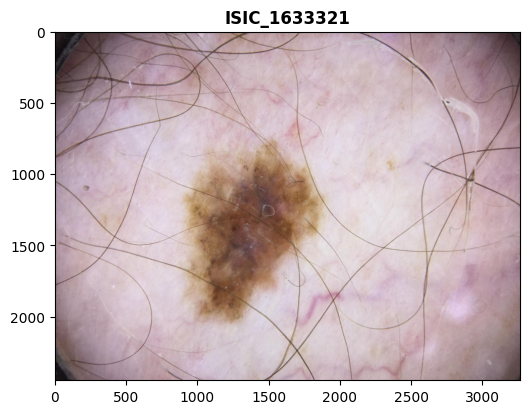

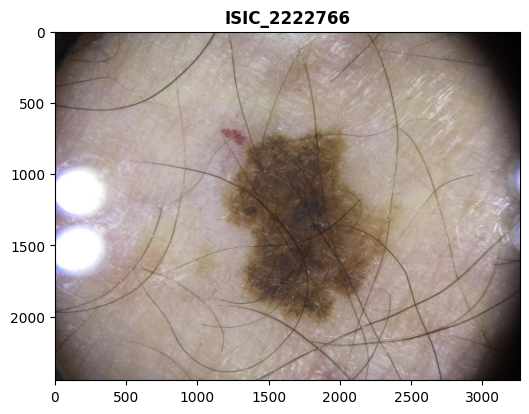

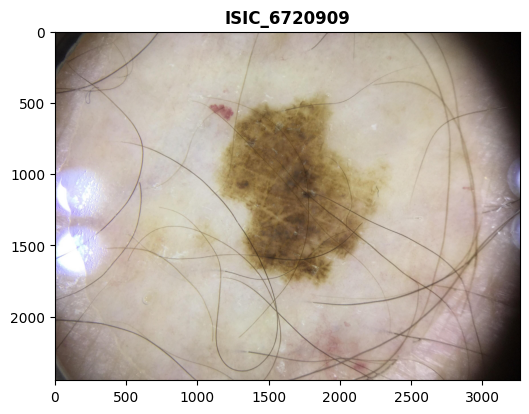

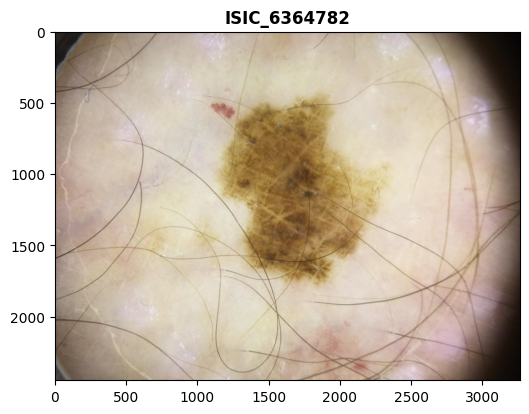

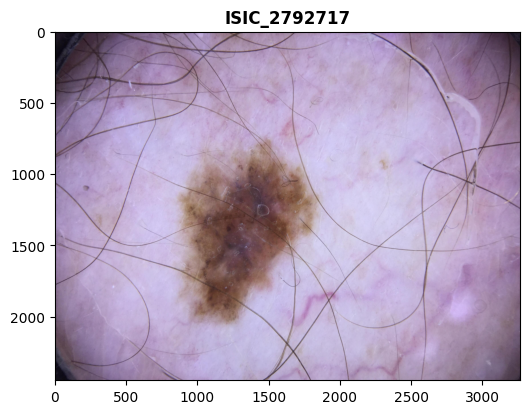

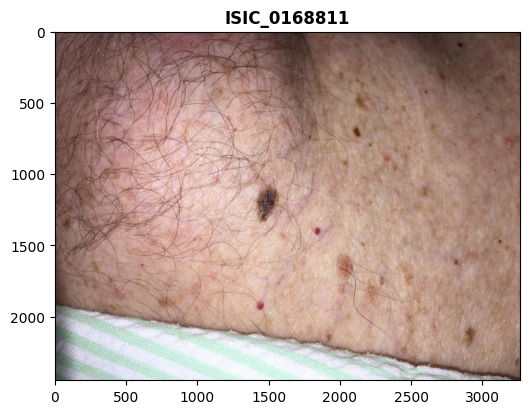

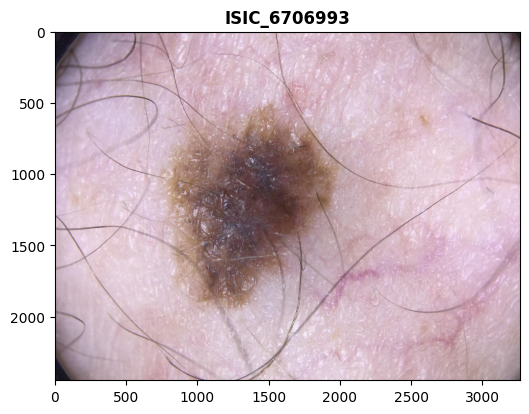

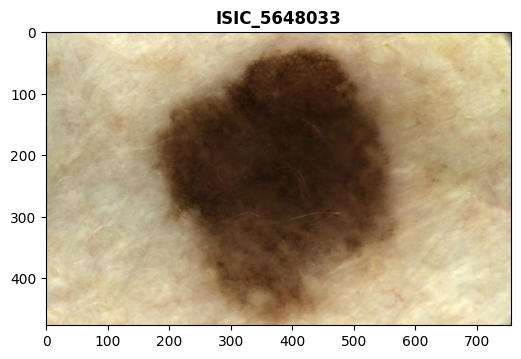

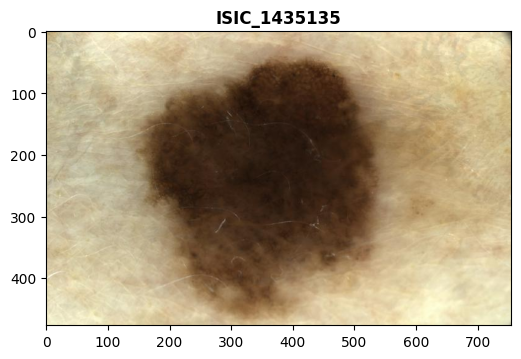

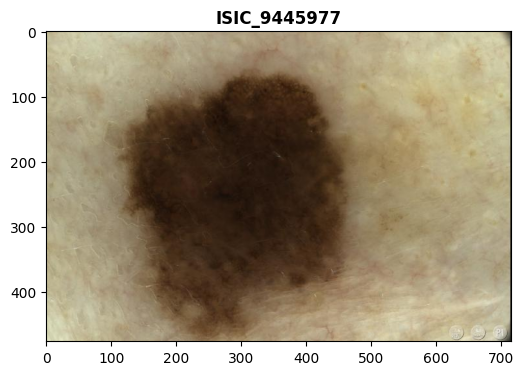

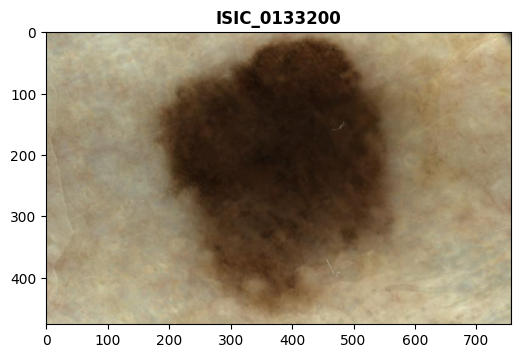

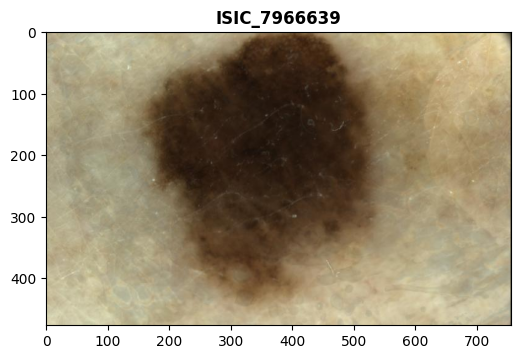

In [7]:
def load_img_from_hdf5(
    isic_id: str, 
    file_path: str|Path = CFG.ADD_TRAIN_HDF5, 
    n_channels: int = 3
):
    """
    Load an image from the HDF5 dataset file by specifying an ISIC ID.
    
    The ISIC ID is expected to be in the form 'ISIC_#######'.
    
    Args:
        isic_id (str): The ID of the image to load.
        file_path (str): The path to the HDF5 file.
        n_channels (int): Number of channels (3 for RGB, 1 for grayscale).
    
    Returns:
        np.ndarray: The loaded image.
    
    Raises:
        KeyError: If the ISIC ID is not found in the HDF5 file.
        ValueError: If the image data cannot be decoded.
    
    Example Usage:
        img = load_img_from_hdf5('ISIC_0000000')
    """
    
    # Handle the case where the isic_id is passed incorrectly
    if not isic_id.lower().startswith("isic"):
        isic_id = f"ISIC_{int(str(isic_id).split('_', 1)[-1]):>07}"
        
    # Open the HDF5 file in read mode
    with h5py.File(file_path, 'r') as hf:
        
        # Retrieve the image data from the HDF5 dataset using the provided ISIC ID
        try:
            image_data = hf[isic_id][()]
        except KeyError:
            raise KeyError(f"ISIC ID {isic_id} not found in HDF5 file.")

        # Convert the binary data to a numpy array
        image_array = np.frombuffer(image_data, np.uint8)

        # Decode the image from the numpy array
        if n_channels == 3:
            # Load the image as a color image (BGR) and convert to RGB
            image = cv2.cvtColor(cv2.imdecode(image_array, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        else:
            # Load the image as a grayscale image
            image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

        # If the image failed to load for some reason (problems decoding) ...
        if image is None:
            raise ValueError(f"Could not decode image for ISIC ID: {isic_id}")
        
        return image
    
isicID_list = train_meta[train_meta['benign_malignant'] == 'malignant']['isic_id'].to_list()
    
for i, isicID in enumerate(isicID_list):
    plt.figure(figsize=(6,6))
    plt.title(isicID, fontweight="bold")
    # plt.imshow(load_img_from_hdf5("ISIC_0015670"))
    plt.imshow(load_img_from_hdf5(isicID))
    plt.show()
    if i > 10:
        break

METADATA_COL2DESC = {
    "isic_id": "Unique identifier for each image case.",
    "benign_malignant": "Binary class label indicating if the lesion is benign (0) or malignant (1).",
    "patient_id": "Unique identifier for each patient.",
    "age_approx": "Approximate age of the patient at the time of imaging.",
    "sex": "Sex of the patient (male or female).",
    "anatom_site_general": "General location of the lesion on the patient's body (e.g., upper extremity, posterior torso).",
    "clin_size_long_diam_mm": "Maximum diameter of the lesion in millimeters.",
    "image_type": "Type of image captured, as defined in the ISIC Archive.",
    "tbp_tile_type": "Lighting modality of the 3D Total Body Photography (TBP) source image.",
    "tbp_lv_A": "Color channel A inside the lesion; related to the green-red axis in LAB color space.",
    "tbp_lv_Aext": "Color channel A outside the lesion; related to the green-red axis in LAB color space.",
    "tbp_lv_B": "Color channel B inside the lesion; related to the blue-yellow axis in LAB color space.",
    "tbp_lv_Bext": "Color channel B outside the lesion; related to the blue-yellow axis in LAB color space.",
    "tbp_lv_C": "Chroma value inside the lesion, indicating color purity.",
    "tbp_lv_Cext": "Chroma value outside the lesion, indicating color purity.",
    "tbp_lv_H": "Hue value inside the lesion, representing the type of color (e.g., red, brown) in LAB color space.",
    "tbp_lv_Hext": "Hue value outside the lesion, representing the type of color (e.g., red, brown) in LAB color space.",
    "tbp_lv_L": "Luminance value inside the lesion; related to lightness in LAB color space.",
    "tbp_lv_Lext": "Luminance value outside the lesion; related to lightness in LAB color space.",
    "tbp_lv_areaMM2": "Area of the lesion in square millimeters.",
    "tbp_lv_area_perim_ratio": "Ratio of the lesion's perimeter to its area, indicating border jaggedness.",
    "tbp_lv_color_std_mean": "Mean color irregularity within the lesion, calculated as the variance of colors.",
    "tbp_lv_deltaA": "Average contrast in color channel A between inside and outside the lesion.",
    "tbp_lv_deltaB": "Average contrast in color channel B between inside and outside the lesion.",
    "tbp_lv_deltaL": "Average contrast in luminance between inside and outside the lesion.",
    "tbp_lv_deltaLB": "Combined contrast between the lesion and its immediate surrounding skin.",
    "tbp_lv_deltaLBnorm": "Normalized contrast between the lesion and its immediate surrounding skin in LAB color space.",
    "tbp_lv_eccentricity": "Eccentricity of the lesion, indicating how elongated it is.",
    "tbp_lv_location": "Detailed anatomical location of the lesion, dividing body parts further (e.g., Left Arm - Upper).",
    "tbp_lv_location_simple": "Simplified anatomical location of the lesion (e.g., Left Arm).",
    "tbp_lv_minorAxisMM": "Smallest diameter of the lesion in millimeters.",
    "tbp_lv_nevi_confidence": "Confidence score (0-100) from a neural network classifier estimating the probability that the lesion is a nevus.",
    "tbp_lv_norm_border": "Normalized border irregularity score on a scale of 0-10.",
    "tbp_lv_norm_color": "Normalized color variation score on a scale of 0-10.",
    "tbp_lv_perimeterMM": "Perimeter of the lesion in millimeters.",
    "tbp_lv_radial_color_std_max": "Color asymmetry score within the lesion, based on color variance in concentric rings.",
    "tbp_lv_stdL": "Standard deviation of luminance within the lesion.",
    "tbp_lv_stdLExt": "Standard deviation of luminance outside the lesion.",
    "tbp_lv_symm_2axis": "Measure of asymmetry of the lesion's border about a secondary axis.",
    "tbp_lv_symm_2axis_angle": "Angle of the secondary axis of symmetry for the lesion's border.",
    "tbp_lv_x": "X-coordinate of the lesion in the 3D TBP model.",
    "tbp_lv_y": "Y-coordinate of the lesion in the 3D TBP model.",
    "tbp_lv_z": "Z-coordinate of the lesion in the 3D TBP model.",
    "attribution": "Source or institution responsible for the image.",
    "copyright_license": "Type of copyright license for the image.",
    "lesion_id": "Unique identifier for lesions that were manually tagged as lesions of interest.",
    "iddx_full": "Full classified diagnosis of the lesion.",
    "iddx_1": "First-level diagnosis of the lesion (e.g., Benign, Malignant).",
    "iddx_2": "Second-level diagnosis providing more specific details about the lesion.",
    "iddx_3": "Third-level diagnosis with further classification details.",
    "iddx_4": "Fourth-level diagnosis with additional specificity.",
    "iddx_5": "Fifth-level diagnosis, providing the most detailed classification.",
    "mel_mitotic_index": "Mitotic index of invasive malignant melanomas, indicating cell division rate.",
    "mel_thick_mm": "Thickness in millimeters of melanoma invasion.",
    "tbp_lv_dnn_lesion_confidence": "Lesion confidence score (0-100) from a deep neural network classifier."
}


METADATA_COL2NAME = {
    "isic_id": "Unique Case Identifier",
    "benign_malignant": "Binary Lession Classification",
    "patient_id": "Unique Patient Identifier",
    "age_approx": "Approximate Age",
    "sex": "Sex",
    "anatom_site_general": "General Anatomical Location",
    "clin_size_long_diam_mm": "Clinical Size (Longest Diameter in mm)",
    "image_type": "Image Type",
    "tbp_tile_type": "TBP Tile Type",
    "tbp_lv_A": "Color Channel A Inside Lesion",
    "tbp_lv_Aext": "Color Channel A Outside Lesion",
    "tbp_lv_B": "Color Channel B Inside Lesion",
    "tbp_lv_Bext": "Color Channel B Outside Lesion",
    "tbp_lv_C": "Chroma Inside Lesion",
    "tbp_lv_Cext": "Chroma Outside Lesion",
    "tbp_lv_H": "Hue Inside Lesion",
    "tbp_lv_Hext": "Hue Outside Lesion",
    "tbp_lv_L": "Luminance Inside Lesion",
    "tbp_lv_Lext": "Luminance Outside Lesion",
    "tbp_lv_areaMM2": "Lesion Area (mm²)",
    "tbp_lv_area_perim_ratio": "Area-to-Perimeter Ratio",
    "tbp_lv_color_std_mean": "Mean Color Irregularity",
    "tbp_lv_deltaA": "Delta A (Inside vs. Outside)",
    "tbp_lv_deltaB": "Delta B (Inside vs. Outside)",
    "tbp_lv_deltaL": "Delta L (Inside vs. Outside)",
    "tbp_lv_deltaLB": "Delta LB (Contrast)",
    "tbp_lv_deltaLBnorm": "Normalized Delta LB (Contrast)",
    "tbp_lv_eccentricity": "Eccentricity",
    "tbp_lv_location": "Detailed Anatomical Location",
    "tbp_lv_location_simple": "Simplified Anatomical Location",
    "tbp_lv_minorAxisMM": "Smallest Diameter (mm)",
    "tbp_lv_nevi_confidence": "Nevus Confidence Score",
    "tbp_lv_norm_border": "Normalized Border Irregularity",
    "tbp_lv_norm_color": "Normalized Color Variation",
    "tbp_lv_perimeterMM": "Lesion Perimeter (mm)",
    "tbp_lv_radial_color_std_max": "Radial Color Standard Deviation",
    "tbp_lv_stdL": "Standard Deviation of Luminance (Inside)",
    "tbp_lv_stdLExt": "Standard Deviation of Luminance (Outside)",
    "tbp_lv_symm_2axis": "Symmetry (Second Axis)",
    "tbp_lv_symm_2axis_angle": "Symmetry Angle (Second Axis)",
    "tbp_lv_x": "X-Coordinate",
    "tbp_lv_y": "Y-Coordinate",
    "tbp_lv_z": "Z-Coordinate",
    "attribution": "Image Source",
    "copyright_license": "Copyright License",
    "lesion_id": "Unique Lesion Identifier",
    "iddx_full": "Full Diagnosis",
    "iddx_1": "First Level Diagnosis",
    "iddx_2": "Second Level Diagnosis",
    "iddx_3": "Third Level Diagnosis",
    "iddx_4": "Fourth Level Diagnosis",
    "iddx_5": "Fifth Level Diagnosis",
    "mel_mitotic_index": "Mitotic Index (Melanoma)",
    "mel_thick_mm": "Thickness of Melanoma (mm)",
    "tbp_lv_dnn_lesion_confidence": "Lesion Confidence Score"
}
